# Unsupervised Learning

<div style="position: relative; padding-bottom: 62.5%; height: 0;">
    <iframe src="https://www.loom.com/embed/8d102517b50047d5bbd1b53c62ecc4d1" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;"></iframe>
</div>

```{jupyter-info}
```

All of the machine learning models we have seen before fall under the category of "supervised learning". This means that in order to train the model, we needed to provide it explicit labels for our training data so it could make predictions. Frequently, we have data without labels which would not work in this setting. The ways to fix this are:

*   Pay someone to label your data. This can be time consuming and prone to errors if your problem is too difficult! 
*  Use a machine learning model that is able to find trends in the data without needing labels. These types of models fall in a category called "unsupervised learning".

One such unsupervised learning method is finding "blobs" in an image. Below, we show code to use a library called "scikit-image" (`skimage`) to load in a picture from the Hubble telescope and trains a model to find the galaxies in the picture. 

`scikit-image` is a popular library for advanced image manipulation. While you can do a lot of things with `numpy`, you can do a TON more with `scikit-image` including some really nice machine learning models that work well with `scikit-image`. You can see an example of its capabilities [here](https://scikit-image.org/docs/stable/auto_examples/).

We did not talk about the specifics of how this specific model works, but it does something to infer where it is likely a galaxy will be and where it is not. Notice we never instructed it what is/isn't a galaxy in our code! The model knows how to find areas that look brighter than others and will infer that for us. This model is **unsupervised** because we didn't have to instruct it what our target was, it just inferred patterns in the data for us since this model looks for brightness.


In [ ]:
import matplotlib.pyplot as plt

from skimage.data import hubble_deep_field
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

%matplotlib inline

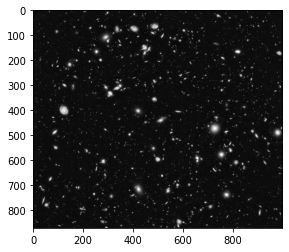

In [ ]:
# Load in the data
image = hubble_deep_field()
# Convert the data from color to black and white
image_gray = rgb2gray(image)
# Plot the image to see what it looks like
plt.imshow(image_gray, cmap=plt.cm.gray)

/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


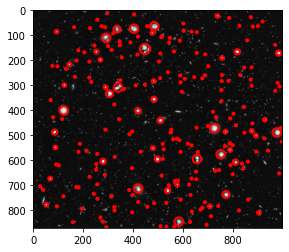

In [ ]:
# Createa a Blob DOH model with the specified hyperparameters
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

# Set up some plot stuff
fig, ax = plt.subplots(1)
ax.imshow(image_gray, cmap=plt.cm.gray)

# For each blob (e.g., galaxy) found by the model
for blob in blobs_doh:
    # Extract its x, y, and size (r)
    y, x, r = blob
    
    # Use matplotlib to draw a circle at that location
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)